# Додаткові завдання №4

## Задача 1.2.15
Нехай $\Omega = {1, 2, \ldots, 2n}$.
Всiм числам приписанi ймовiрностi, пропорцiйнi логарифмам цих чисел.
Знайти цi ймовiрностi.
Знайти ймовiрнiсть того, що в результатi експерименту з’явиться:
1. парне число;
2. непарне число.

### Завдання 1
Реалізуйте випадкову величину, описану в умові задачі, за допомогою класу [scipy.stats.rv_discrete](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html) в залежності від параметра $n$.

Створіть дві випадкові величини для:
- $n = 10$;
- $n = 25$.

In [1]:
from scipy.stats import rv_discrete
import numpy as np
import matplotlib.pyplot as plt
import math

class p_gen(rv_discrete):
    "Poisson distribution"
    def _pmf(self, k, p):
        return np.log(k)*p
    def _cdf(self, k, p):
        res = []
        for el in k:
            res.append(sum(self._pmf(np.arange(1,el),p)))
        return res
    def _rvs(self, n, p, size):
        f = lambda x: np.log(x)*p
        x = np.arange(1,n*2+1)
        return np.random.choice(x,p=f(x),size=size)
    
pr = p_gen()
print(f'n = {10}, rvs = {pr._rvs(10,1/math.log(math.factorial(10*2)),2)}')
print(f'n = {25}, rvs = {pr._rvs(25,1/math.log(math.factorial(25*2)),2)}')

n = 10, rvs = [12 11]
n = 25, rvs = [26 42]


In [2]:
#------------Варіант 2---------------
from scipy import stats

def prob(n):
    x = np.arange(1,n*2+1) 
    p = 1/math.log(math.factorial(n*2))
    f = np.log(x)*p
    fun = stats.rv_discrete(name='prob', values=(x, f))
    return fun

### Завдання 2
Зобразіть графічно функцію щільності, функцію розподілу та гістограму $10000$ значень отриманої випадкової величини в залежності від параметра $n$:
- $n = 10$;
- $n = 25$.

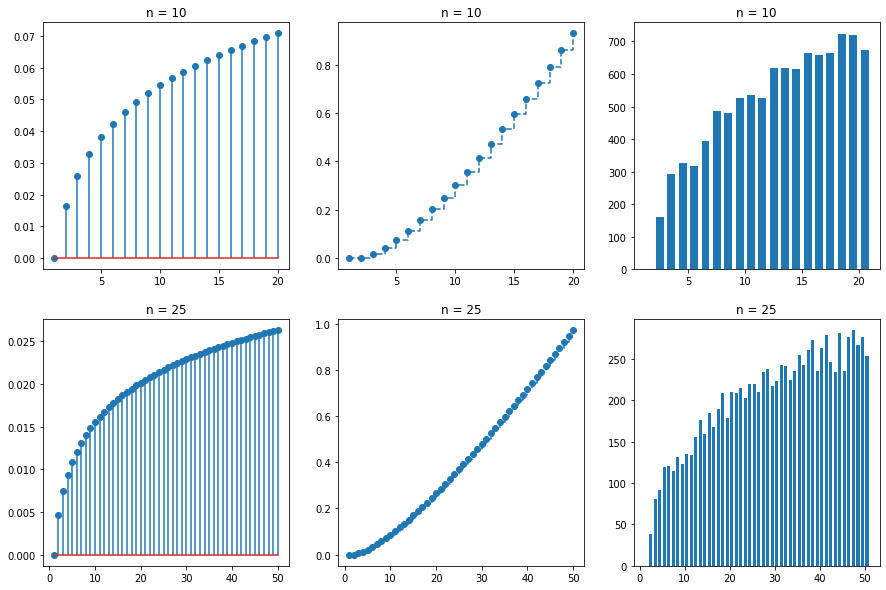

In [3]:
np.seterr(divide='ignore', invalid='ignore')

n_v = [10,25]

fig, axs = plt.subplots(2, 3, figsize=(15,10))
pr = p_gen()
p = 0.5

for ind, n in enumerate(n_v):
    p = 1/math.log(math.factorial(n*2))
    x = np.arange(1,n*2+1)
    axs[ind,0].stem(x, pr._pmf(x,p), use_line_collection=True)
    axs[ind,0].set_title(f"n = {n}")
    axs[ind,1].plot(x, pr._cdf(x,p), '--o', drawstyle='steps-post')
    axs[ind,1].set_title(f"n = {n}")
    axs[ind,2].hist(pr._rvs(n,p,10000),np.arange(1,n*2+2), rwidth = 0.7)
    axs[ind,2].set_title(f"n = {n}")

### Завдання 3
Напишіть функцію для обрахунку теоретичної (через щільність отриманої випадкової величини) імовірності в залежності від параметра $n$.

Виведіть результат для:
- $n = 10$;
- $n = 25$.

In [4]:
n_l = [10,25]
for n in n_l:
    funk = prob(n)
    even = np.arange(2,2*n+1,2)
    odd = np.arange(1,2*n+1,2)
    x1 = funk.pmf(even)
    x2 = funk.pmf(odd)
    print(f'n = {n}\nТеор ймовірність парного числа = {sum(x1)}\nТеор ймовірність непарного числа = {sum(x2)}')

n = 10
Теор ймовірність парного числа = 0.5205046299279227
Теор ймовірність непарного числа = 0.47949537007207715
n = 25
Теор ймовірність парного числа = 0.5073640739858903
Теор ймовірність непарного числа = 0.4926359260141097


### Завдання 4
Напишіть функцію для обрахунку еміричної (симулюванням $1000000$ значень отриманої випадкової величини) імовірності в залежності від параметра $n$.

Виведіть результат для:
- $n = 10$;
- $n = 25$.

In [5]:
n_l = [10,25]
for n in n_l:
    funk = prob(n)
    x = funk.rvs(size = 1000000)
    print(f'n = {n}\nЕмірична ймовірність парного числа = {sum(x%2 == 0)/1000000}\nЕмірична ймовірність непарного числа = {(1000000 - sum(x%2 == 0))/1000000}')

n = 10
Емірична ймовірність парного числа = 0.520557
Емірична ймовірність непарного числа = 0.479443
n = 25
Емірична ймовірність парного числа = 0.50655
Емірична ймовірність непарного числа = 0.49345
